## Trcking the masses of input samples since autoEncoder output is correlated with mass

In [1]:
import numpy as np
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import h5py
import pickle
import pandas
import matplotlib.pyplot as plt
#import deepdish.io as io
import tensorflow as tf
from keras.models import Model,Sequential
from keras.layers import Input, Dense, Dropout
from keras.utils import plot_model
from keras.models import load_model
from sklearn.preprocessing import scale, normalize
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
import seaborn as sns

Using TensorFlow backend.


In [2]:
f_qcdmass=h5py.File('/lcg/storage13/atlas/martinj/h5/pp_jj/final_jj_1MEvents.h5','r')

In [3]:
qcd_mass = f_qcdmass["objects/jets/obs"][:,0]

In [4]:
qcd_mass.shape

(705643, 9)

In [5]:
qcd_mass[1]

array([727.78908448,  -1.65506998,   1.00065047,  95.95585166,
        29.31041336,  21.55031967,  14.1101923 ,  10.8286705 ,
         9.35908318])

In [6]:
qcd_mass = qcd_mass[:,3]

In [7]:
qcd_mass[1]

95.95585166414908

(0, 400)

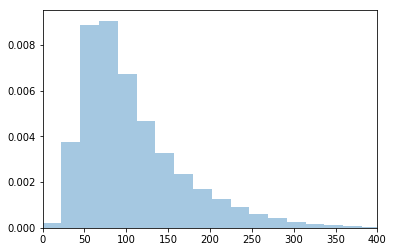

In [9]:
#plt.hist(qcd_mass, histtype="step", label='QCD')
#plt.show
sns.distplot(qcd_mass, kde = False, norm_hist = True)
plt.xlim(0, 400)

In [10]:
f_ttmass=h5py.File('/lcg/storage13/atlas/martinj/h5/pp_tt/final_tt_500kEvents.h5','r')

In [11]:
tt_mass = f_ttmass["objects/jets/obs"][:,0]

In [12]:
tt_mass.shape

(320124, 9)

In [13]:
tt_mass = tt_mass[:,3]

In [14]:
#plt.hist(tt_mass, histtype="step", label='QCD', density = 'True')
#plt.show
sns.distplot(tt_mass, kde = False, norm_hist = True, label = ttbar);
plt.xlim(0, 400)

NameError: name 'ttbar' is not defined

In [33]:
f_zbmass = h5py.File('/lcg/storage13/atlas/gupta/stealth_boson/Zp3300_S400A80.h5','r')

In [34]:
zb_mass = f_zbmass["objects/jets/obs"][:,0]

In [35]:
zb_mass.shape

(96990, 9)

In [36]:
zb_mass[1]

array([ 1.37403623e+03,  5.37026084e-01, -1.53382150e+00,  3.50081452e+02,
        1.70520276e-01,  7.44179636e-02,  4.44396697e-02,  2.25932952e-02,
        1.90145876e-02])

In [37]:
zb = zb_mass[:,3]

In [38]:
zb.shape

(96990,)

(0, 1000)

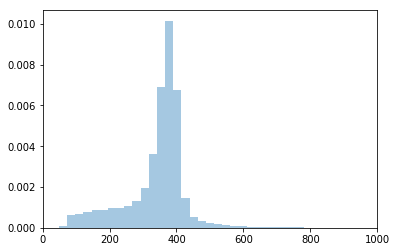

In [39]:
sns.distplot(zb, kde = False, norm_hist = True);
plt.xlim(0, 1000)

(0, 300)

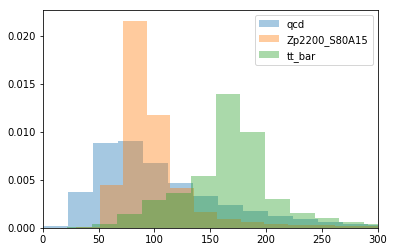

In [25]:
#plt.hist(zb, histtype="step", label='zb')
#plt.xlim(0,150)
#plt.show
sns.distplot(qcd_mass, kde = False, norm_hist = True, label = "qcd")
sns.distplot(zb, kde = False, norm_hist = True, label = "Zp2200_S80A15")
sns.distplot(tt_mass, kde = False, norm_hist = True, label = "tt_bar")
plt.legend()
plt.xlim(0, 300)